In [47]:
%pip install git+https://github.com/nndt-team/nndt.git
%pip install ipyvtklink

  Cloning https://github.com/nndt-team/nndt.git to /tmp/pip-req-build-vxhlf_29
  Running command git clone -q https://github.com/nndt-team/nndt.git /tmp/pip-req-build-vxhlf_29
  Resolved https://github.com/nndt-team/nndt.git to commit c4850b38a5d82ce379a145e17fcb6a547af2c5f1


  Created wheel for NNDT: filename=NNDT-0.0.3b1-py3-none-any.whl size=49113 sha256=bcd7d7d129401444fd214b6cbb8982858e19319aab9f346bdeb3be0f9c58a875
  Stored in directory: /tmp/pip-ephem-wheel-cache-609gvw8d/wheels/48/e6/b0/eed564ae0a50dab01b1cf11f639b92028e56be7ec1205789dc
Successfully built NNDT
  Attempting uninstall: NNDT
    Found existing installation: NNDT 0.0.3a3
    Can't uninstall 'NNDT'. No files were found to uninstall.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [48]:
import nndt
import nndt.space2 as spc
from nndt.datasets import ACDC

nndt.__version__

'0.0.3b1'

In [49]:
import pyvista as pv
import jax.numpy as jnp

`nndt.init_colab()` turns on interactive plots in google collaboratory. This string is not necessary in py-scripts or jupyter notebook.

In [50]:
# nndt.init_colab()

Load data

In [51]:
ACDC().load()

Downloading...
From: https://drive.google.com/uc?export=download&id=1UzC2WPkjMQSxzI5sj1rMT47URuZbQhYb
To: /home/kostanew/PycharmProjects/nndt/tutorials/.datasets/ACDC_5/temp.7z
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9.01M/9.01M [00:01<00:00, 4.74MB/s]


Loading complete


In [52]:
space = spc.load_from_path("./.datasets/ACDC_5")
space.preload("shift_and_scale", ns_padding=(0.1, 0.1, 0.1))
print(space.print())

S:space 0.0.3b1
├── O3D:patient009 ((-0.85, -0.81, -0.87), (0.85, 0.81, 0.87))
│   ├── FS:colored_obj mesh_obj^ ./.datasets/ACDC_5/patient009/colored.obj
│   ├── FS:sdf_npy sdt^ ./.datasets/ACDC_5/patient009/sdf.npy
│   ├── TR:transform shift_and_scale
│   ├── MS:mesh
│   ├── MS:mesh_colors
│   ├── MS:sampling
│   ├── MS:sdt
│   ├── MS:train_task
│   ├── plot(default, filepath=None)
│   ├── print(default|source|full)
│   ├── sampling_eachN_from_mesh(count=N, step=M, shift=K) -> (ns_ind[N], ns_xyz[N])
│   ├── sampling_grid(spacing=(D,H,W)) -> ns_xyz[D,H,W,3]
│   ├── sampling_grid_with_noise(key, spacing=(D,H,W), sigma) -> ns_xyz[N,3]
│   ├── sampling_uniform(key, N) -> ns_xyz[N,3]
│   ├── save_mesh(filepath, {name, array})
│   ├── surface_ind2rgba(ind[..,1]) -> rgba[..,4]
│   ├── surface_ind2xyz(ind[..,1]) -> ns_xyz[..,3]
│   ├── surface_rgba() -> xyz[N,4]
│   ├── surface_xyz() -> xyz[N,3]
│   ├── surface_xyz2ind(ns_xyz[..,3]) -> ns_dist[..,1], ns_ind[..,1]
│   ├── surface_xyz2localsdt(

Examples for `save_3D_slices` with data arrays

In [53]:
cube_xyz = space.patient009.sampling_grid((32, 32, 32))
cube_std = space.patient009.surface_xyz2sdt(cube_xyz)
cube_std = cube_std[:, :, :, 0]
cube_xyz.shape, cube_std.shape

((32, 32, 32, 3), (32, 32, 32))

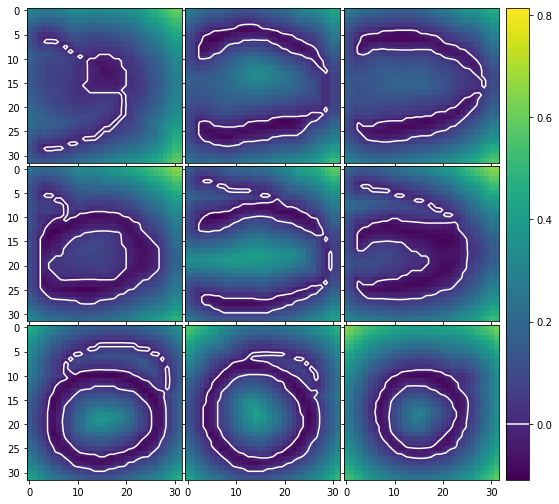

In [54]:
nndt.save_3D_slices(cube_std, "./viz1.png", include_boundary=False)

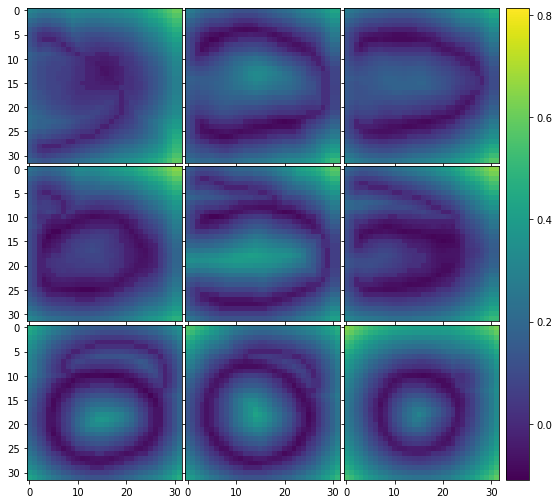

In [55]:
nndt.save_3D_slices(
    cube_std, "./viz1.png", levels=(), level_colors=(), include_boundary=False
)

Examples for `save_3D_slices` with RGB/RGBA colors

In [56]:
cube_rgba = space.patient009.surface_xyz2rgba(cube_xyz)
cube_rgba = cube_rgba
cube_rgba.shape

(32, 32, 32, 4)

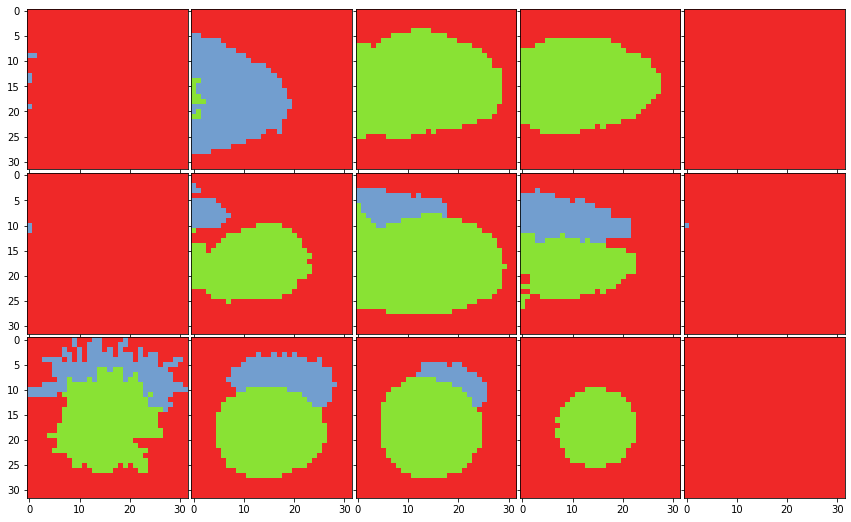

In [57]:
nndt.save_3D_slices(cube_rgba, include_boundary=True)

Examples for `save_sdt_as_obj`

In [58]:
nndt.save_sdt_as_obj(cube_std, "./model.obj")

In [59]:
mesh = pv.read("./model.obj")
cpos = mesh.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Load data and put values into `.vtp` output using `.save_mesh()`

In [60]:
vertex = space.patient009.surface_xyz()
vertex_rgba = space.patient009.surface_rgba()
vertex_from_full_sampling = space.patient009.sampling_eachN_from_mesh(len(vertex), 1, 0)
len(vertex), len(vertex_rgba), len(vertex_from_full_sampling[1])

(2502, 2502, 2502)

In [61]:
jnp.allclose(vertex, vertex_from_full_sampling[1])

DeviceArray(True, dtype=bool)

In [62]:
space.patient009.save_mesh(
    "./output.vtp",
    {
        "red": vertex_rgba[:, 0],
        "green": vertex_rgba[:, 1],
        "blue": vertex_rgba[:, 2],
        "alpha": vertex_rgba[:, 2],
        "x": vertex[:, 0],
        "y": vertex[:, 1],
        "z": vertex[:, 2],
        "target_class": jnp.argmax(vertex_rgba[:, :3], axis=1),
    },
)

In [63]:
mesh = pv.read("./output.vtp")
cpos = mesh.plot(scalars="target_class", show_edges=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)